# Hands-on Practice for Module 1: Exploratory Data Analysis

### 0. Importing necessary packages

In [4]:
# data loading and computing functionality
import pandas as pd
import numpy as np
import scipy as sp

# datasets in sklearn package
from sklearn.datasets import load_digits

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

#PCA, SVD, LDA
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



### 1. Loading data, determining samples, attributes, and types of attributes

<span style="color:red">**Question:** </span> Where is the data obtained from?

<span style="color:green">Answer: </span> 
Data is obtained from the URL https://raw.githubusercontent.com/plotly/datasets/master/iris.csv that is originally part of the UCI Machine Learning repository. https://archive.ics.uci.edu/ml/datasets/iris


In [5]:
import pandas as pd
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [6]:
type(iris_df)

pandas.core.frame.DataFrame

<span style="color:red">**Question:** </span> What does the data capture?




<span style="color:green">Answer: </span> 
Data captures four properties (Sepal Length, Sepal Width, Petal Length, Petal Width) of three types of Iris plants. 


<span style="color:red">**Question:** </span> How many data points are there? 

In [7]:
iris_df.shape

(150, 5)

<span style="color:green">Answer: </span> 
There are 50 instances/data points for each type. Collectively, 150 data points. 


<span style="color:red">**Question:** </span> What is the dimensionality?


In [8]:
iris_df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object

In [9]:
iris_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<span style="color:green">Answer: </span> 
There are four attributes (Sepal Length, Sepal Width, Petal Length, Petal Width) and one label (Name).


<span style="color:red">**Question:** </span> What type of attributes are present in the dataset? 

In [10]:
iris_df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object

<span style="color:green">Answer: </span> 
All four attributes are continuous-valued.

### 2. Generating summary statistics

<span style="color:red">**Question:** </span> What are range of values these numeric attributes take? 

In [11]:
iris_df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<span style="color:red">**Question:** </span> What are the mean values for each of the attributes?

In [12]:
from pandas.api.types import is_numeric_dtype

for col in iris_df.columns:
    if is_numeric_dtype(iris_df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % iris_df[col].mean())
        

SepalLength:
	 Mean = 5.84
SepalWidth:
	 Mean = 3.05
PetalLength:
	 Mean = 3.76
PetalWidth:
	 Mean = 1.20


<span style="color:red">**Question:** </span> What is the variance for each of the attributes?

In [13]:
from pandas.api.types import is_numeric_dtype

for col in iris_df.columns:
    if is_numeric_dtype(iris_df[col]):
        print('%s:' % (col))
        print('\t Variance = %.2f' % iris_df[col].var())        

SepalLength:
	 Variance = 0.69
SepalWidth:
	 Variance = 0.19
PetalLength:
	 Variance = 3.11
PetalWidth:
	 Variance = 0.58


<span style="color:red">**Question:** </span> Visually examine how the attribute PetalLength is distributed and comment if the data is Normally distributed? 

Introducing **Seaborn**, a statistical data visualization library

Visualizing a histogram for a numerical attribute using distplot function in seaborn

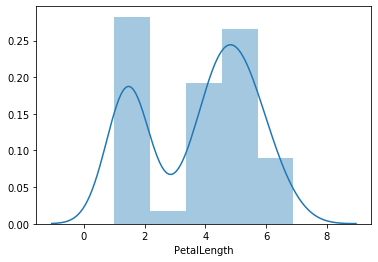

In [14]:
sns.distplot(iris_df['PetalLength']);

<span style="color:green">Answer: </span> 
PetalLength is not Normally distributed. The distribution appears to be bimodal. 

<span style="color:red">**Question:** </span> Visually examine how the label (Name) attribute is distributed and comment if the data is uniformly distributed? 

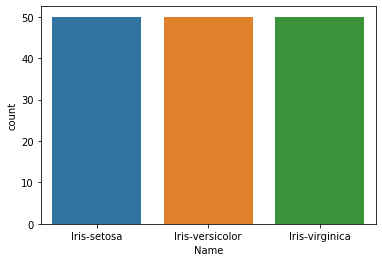

In [15]:
sns.countplot(iris_df['Name']);

<span style="color:green">Answer: </span> 
The label is uniformly distributed as all classes have exactly 50 data points. 

### 3. Geometric view and Probabilistic view

For this part, we will restrict to SepalLength and SepalWidth attributes as we can only visualize 2D space.

<span style="color:red">**Question:** </span> Show the Geometric view of the data on a 2D space along with the mean. 

In [16]:
iris_df_new = iris_df[['SepalLength','SepalWidth']]

In [17]:
iris_df_new.head()

,SepalLength,SepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


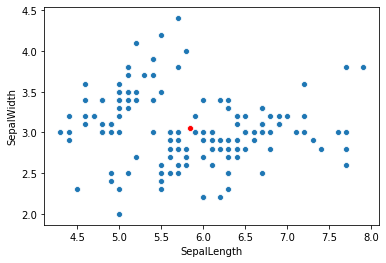

In [18]:
fig, ax = plt.subplots()
sns.scatterplot(x='SepalLength',y='SepalWidth',data=iris_df_new,ax=ax)
mu = np.mean(iris_df_new.values,0)
sns.scatterplot(x=[mu[0], mu[0]],y=[mu[1], mu[1]],color='r',ax=ax)

<span style="color:red">**Question:** </span> Based on the geometric view of the data, which of the points [6.5, 3.0], [7.5, 3.0] are more closer to the mean?

<span style="color:green">Answer: </span> [6.5, 3.0] is more closer to the mean shown in red circle.

<span style="color:red">**Question:** </span> Show the probabilistic view of the data. Assume that the data is drawn from a 2D distribution.

In [19]:
from scipy.stats import multivariate_normal

mu = np.mean(iris_df_new.values,0)
Sigma = np.cov(iris_df_new.values.transpose())

min_length = np.min(iris_df_new.values[:,0]);
min_width = np.min(iris_df_new.values[:,1]);
max_length = np.max(iris_df_new.values[:,0]);
max_width = np.max(iris_df_new.values[:,1]);
x, y = np.mgrid[min_length:max_length:50j, min_width:max_width:50j]

positions = np.empty(x.shape + (2,))
positions[:, :, 0] = x; 
positions[:, :, 1] = y

F = multivariate_normal(mu, Sigma)
Z = F.pdf(positions)


Text(0.5, 1.0, 'Probabilistic view')

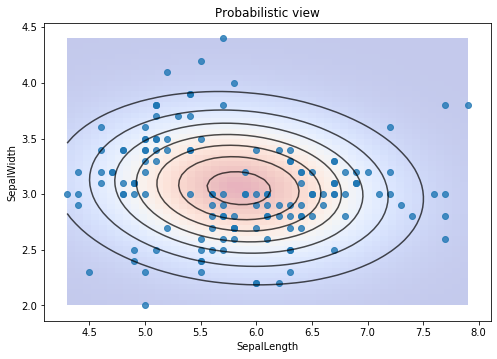

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[min_length,max_length, min_width,max_width], alpha=0.3)
cset = ax.contour(x, y, Z, colors='k', alpha=0.7)
plt.scatter(iris_df_new.values[:,0],iris_df_new.values[:,1],alpha=0.8)
ax.set_xlabel('SepalLength')
ax.set_ylabel('SepalWidth')
plt.title('Probabilistic view')

<span style="color:red">**Question:** </span> Based on the probabilistic view of the data, which of the points [5.8, 3.0], [6.5, 3.0] are more likely to have been generated from the bivariate normal distribution? Provide your reason.

<span style="color:green">Answer: </span> [5.8, 3.0]. The probability density at this point is higher than that of [6.5, 3.0].

### 3. Understanding the (in)dependencies among attributes using Covariance matrix

<span style="color:red">**Question:** </span> What is the covariance matrix? 

Selecting the relevant data...

In [21]:
data = iris_df.values[:,0:4]
data[1:10,:]

array([[4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]], dtype=object)

In [22]:
def mycov(data, col_a, col_b):
    mu = np.mean(data, axis=0) #compute mean
    sum = 0;
    for i in range(0, len(data)):
        sum += ((data[i,col_a] - mu[col_a]) * (data[i,col_b] - mu[col_b]))

    return sum/(len(data)-1)

In [23]:
[mycov(data,0,0), mycov(data,0,1), mycov(data,0,2), mycov(data,0,3)]

[0.6856935123042505,
 -0.03926845637583892,
 1.2736823266219242,
 0.5169038031319912]

In [24]:
print('Covariance:')
iris_df.cov()

Covariance:


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.685694,-0.039268,1.273682,0.516904
SepalWidth,-0.039268,0.188004,-0.321713,-0.117981
PetalLength,1.273682,-0.321713,3.113179,1.296387
PetalWidth,0.516904,-0.117981,1.296387,0.582414


<span style="color:red">**Question:** </span> Which pairs of attributes co-vary in the same direction?

<span style="color:green">Answer: </span> 

SepalLength, PetalLength

SepalLength, PetalWidth

PetalLength, PetalWidth

<span style="color:red">**Question:** </span> Which pairs of attributes are highly correlated? List all such pairs.

In [25]:
print('Correlation:')
iris_df.corr()

Correlation:


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


<span style="color:green">Answer: </span> 
Highly correlated pairs listed in decreasing order of correlation.

PetalLength, PetalWidth

SepalLength, PetalLength

SepalLength, PetalWidth


<span style="color:red">**Question:** </span> Which pairs of attributes are uncorrelated/weakly correlated? 

<span style="color:green">Answer: </span> 
Highly correlated pairs listed in decreasing order of correlation.

SepalLength, SepalWidth


### 4. Visualizing relationships between attributes  

<span style="color:red">**Question:** </span>
Visualize the iris dataset using a pairplot and comment if PetalLength and PetalWidth have positive covariance. 

*pairplot* function in seaborn library simultaneously generates histograms for individual attributes and pairwise scatter plots.

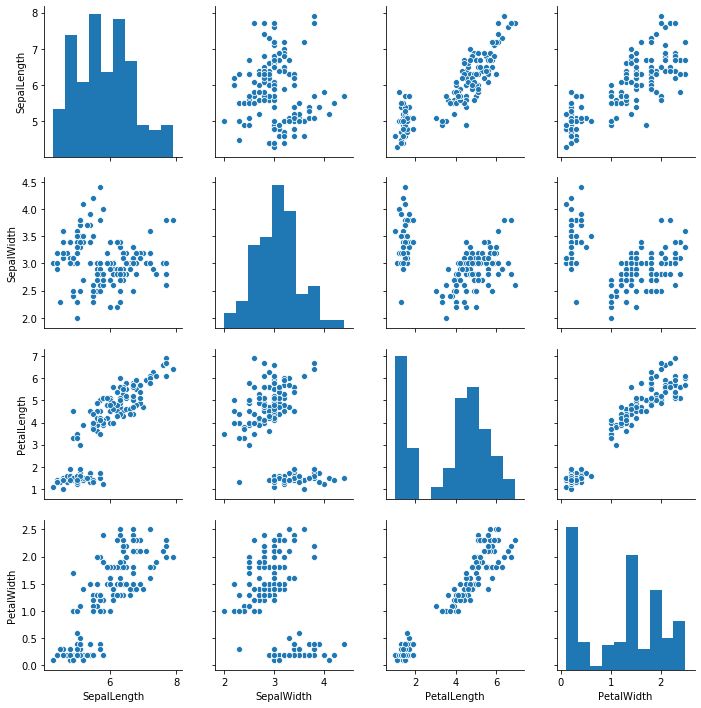

In [26]:
sns.pairplot(iris_df)

<span style="color:green">Answer: </span> 

From the above plot, PetalLength and PetalWidth have positive covariance.


<span style="color:red">**Question:** </span>
Visualize the iris dataset using a pairplot and comment if the three classes can be separated if SepalLength and SepalWidth are the only variables used. 

Pair plots allows you to do separate histograms and color scatter plots based on a categorical attribute.

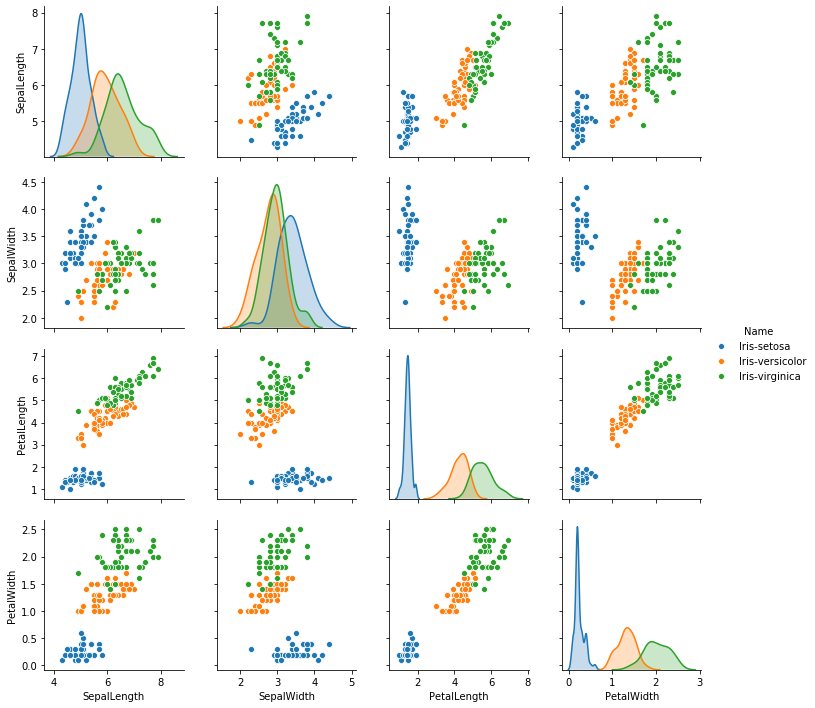

In [27]:
import seaborn as sns
sns.pairplot(iris_df, hue="Name")

<span style="color:green">Answer: </span> 

From the above plot, we can observe that for SepalLength and SepalWidth attributes the orange and green datapoints overlap. Hence, SepalLength and SepalWidth attributes cannot separate the three classes.


### 5. Dimensionality Reduction: PCA


<span style="color:red">**Question:** </span>
Project points in the digits dataset onto a two-dimensional space using PCA. 

Steps involved in PCA
1. Input data: set of points in $R^d$
2. Compute covariance matrix $\Sigma$ (a $d \times d$ matrix)
3. Compute Eigenvectors of $\Sigma$
4. Select $r$ Eigenvectors (based on a parameter or based on variance explained) corresponding to the highest eigenvalues
5. Project data on to the new $r$ dimensional space

Step 1: Load data

In [28]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [29]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

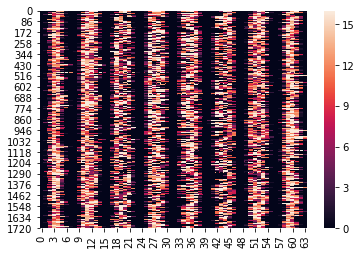

In [30]:
sns.heatmap(digits.data)

Plotting one data point as an 8x8 image

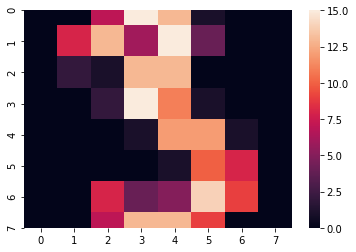

In [69]:
sns.heatmap(np.reshape(digits.data[3,:],[8,8]))

Step 2: Compute covariance matrix $\Sigma$ (a $d \times d$ matrix)

In [32]:
digits_cov = np.empty([np.size(digits.data,1), np.size(digits.data,1)]);
for i in range (0, np.size(digits.data,1)):
    for j in range (i, np.size(digits.data,1)):
        digits_cov[i,j] = mycov(digits.data,i,j);
        digits_cov[j,i] = digits_cov[i,j];

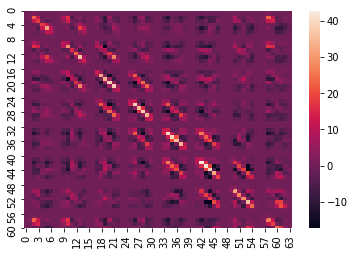

In [33]:
sns.heatmap(digits_cov)

Step 3: Compute Eigenvectors of $\Sigma$

In [34]:
w,v = np.linalg.eig(digits_cov)

In [35]:
w

array([1.79006930e+02, 1.63717747e+02, 1.41788439e+02, 1.01100375e+02,
       6.95131656e+01, 5.91085249e+01, 5.18845391e+01, 4.40151067e+01,
       4.03109953e+01, 3.70117984e+01, 2.85190412e+01, 2.73211698e+01,
       2.19014881e+01, 2.13243565e+01, 1.76367222e+01, 1.69468639e+01,
       1.58513899e+01, 1.50044602e+01, 1.22344732e+01, 1.08868593e+01,
       1.06935663e+01, 9.58259779e+00, 9.22640260e+00, 8.69036872e+00,
       8.36561190e+00, 7.16577961e+00, 6.91973881e+00, 6.19295508e+00,
       5.88499123e+00, 5.15586690e+00, 4.49129656e+00, 4.24687799e+00,
       4.04743883e+00, 3.94340334e+00, 3.70647245e+00, 3.53165306e+00,
       3.08457409e+00, 2.73780002e+00, 2.67210896e+00, 2.54170563e+00,
       2.28298744e+00, 1.90724229e+00, 1.81716569e+00, 1.68996439e+00,
       1.40197220e+00, 1.29221888e+00, 1.15893419e+00, 9.31220008e-01,
       6.69850594e-01, 4.86065217e-01, 2.52350432e-01, 9.91527944e-02,
       6.31307848e-02, 6.07377581e-02, 3.96662297e-02, 1.49505636e-02,
      

In [36]:
np.shape(v)

(64, 64)

In [37]:
np.matmul(v,  np.transpose(v))

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -1.97924071e-15, ...,
        -1.00142651e-15,  4.66212630e-15, -2.24733935e-15],
       [ 0.00000000e+00, -1.97924071e-15,  1.00000000e+00, ...,
         1.87544424e-16, -2.88794864e-15,  1.42406371e-14],
       ...,
       [ 0.00000000e+00, -1.00142651e-15,  1.87544424e-16, ...,
         1.00000000e+00,  4.07777602e-16, -1.04606438e-14],
       [ 0.00000000e+00,  4.66212630e-15, -2.88794864e-15, ...,
         4.07777602e-16,  1.00000000e+00,  1.36530695e-14],
       [ 0.00000000e+00, -2.24733935e-15,  1.42406371e-14, ...,
        -1.04606438e-14,  1.36530695e-14,  1.00000000e+00]])

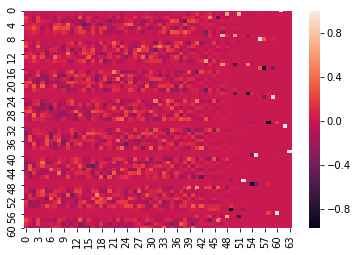

In [38]:
sns.heatmap(v)

Step 4: Select $r$ Eigenvectors (based on a parameter or based on variance explained) corresponding to the highest eigenvalues

Variance captured by each of the principal directions

Text(0, 0.5, 'variance')

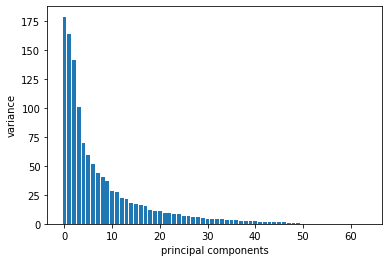

In [39]:
plt.bar(np.arange(64),w)
plt.xlabel('principal components')
plt.ylabel('variance')

Cumulative variance captured

In [40]:
np.cumsum(w)/np.sum(w)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

Text(0, 0.5, 'Cumulative variance covered')

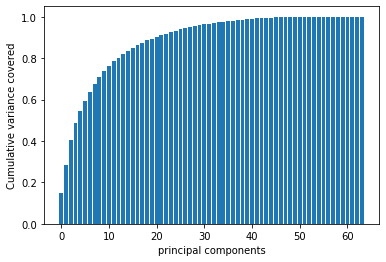

In [41]:
plt.bar(np.arange(64),np.cumsum(w)/np.sum(w))
plt.xlabel('principal components')
plt.ylabel('Cumulative variance covered')

Step 5: Project data on to the new $r$ dimensional space

In [42]:
projected_data = np.matmul(digits.data,v[:,0:2])

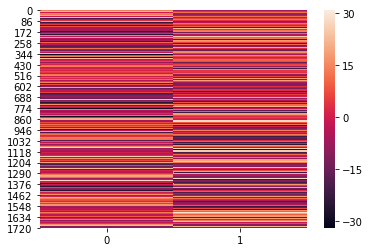

In [43]:
sns.heatmap(projected_data)

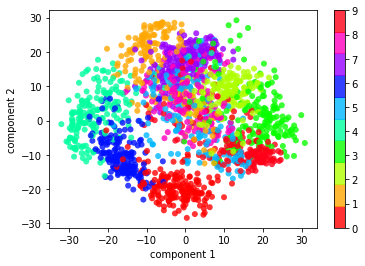

In [44]:
plt.scatter(projected_data[:, 0], projected_data[:, 1],
            c=digits.target, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('hsv', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

A much simpler way to do PCA using library function from sklearn:

In [45]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)    

(1797, 64)
(1797, 2)


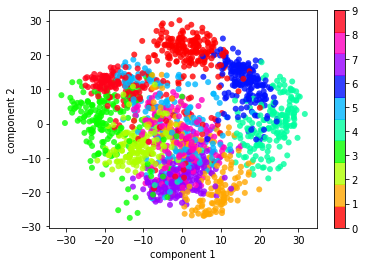

In [46]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('hsv', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### 6. Singular Value Decomposition

<span style="color:red">**Question:** </span>
Compute SVD on the following matrix A using svd() function from scipy library. 

In [47]:
A = np.array([
    [1, 1, 1, 0, 0],
    [3, 3, 3, 0, 0],
    [4, 4, 4, 0, 0],
    [5, 5, 5, 0, 0],
    [0, 0, 0, 4, 4],
    [0, 0, 0, 5, 5],
    [0, 0, 0, 2, 2]])

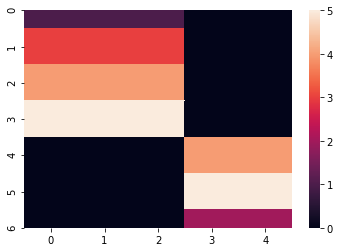

In [48]:
sns.heatmap(A)

Computing SVD using scipy library function svd()

In [49]:
U, S, V = svd(A, full_matrices = False)

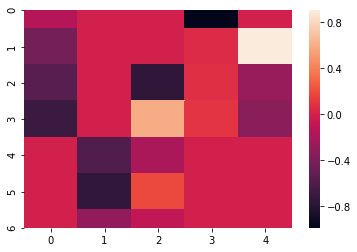

In [50]:
sns.heatmap(U)

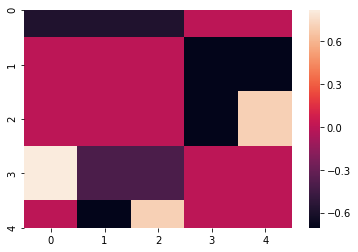

In [51]:
sns.heatmap(V)

Reconstructing the matrix from the factors

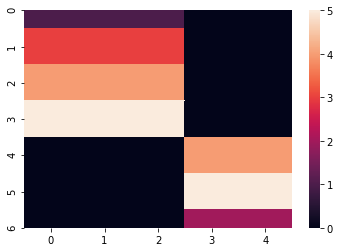

In [52]:
sns.heatmap(np.matmul(np.matmul(U,np.diag(S)), V))

Visualizing the spectral decomposition from U and V. The first element in spectral decomposition is $\delta_1u_1v_1^T$ is

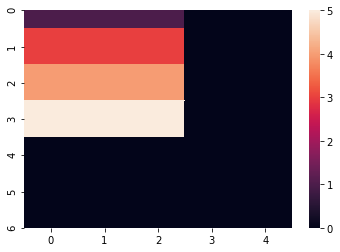

In [53]:
sns.heatmap(S[0]*np.outer(U[:,0],V[0,:]))

The second element $\delta_2u_2v_2^T$ is

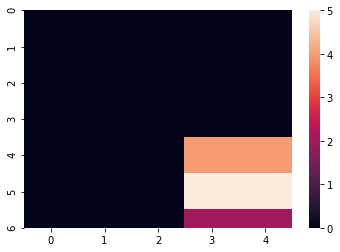

In [54]:
sns.heatmap(S[1]*np.outer(U[:,1],V[1,:]))

<span style="color:red">**Question:** </span>
Determine number of spectral values that must be used to capture 90% of the data. 

In [55]:
S

array([1.23693169e+01, 9.48683298e+00, 3.16341117e-16, 2.88717587e-16,
       3.64663694e-32])

First, plotting the variance captured by each spectral value. 

Text(0, 0.5, 'variance covered')

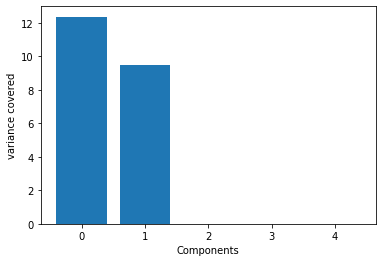

In [56]:
plt.bar(np.arange(5),S)
plt.xlabel('Components')
plt.ylabel('variance covered')

Second, plotting the fraction of variance captured by first $r$ spectral values. 

Text(0, 0.5, 'Cumulative variance covered')

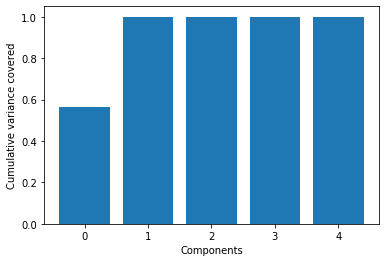

In [57]:
plt.bar(np.arange(5),np.cumsum(S)/np.sum(S))
plt.xlabel('Components')
plt.ylabel('Cumulative variance covered')

<span style="color:green">Answer: </span> 

First two spectral values are needed to capture 90% of the variance.

### 7. Linear Discriminant Analysis

We will use iris data to study LDA. 

In [58]:
X = iris_df.values[:,0:4]
y = iris_df.values[:,4] 

We will use the first 100 samples. The first 50 are of the class 'Iris-setosa' and the rest are of the class 'Iris-versicolor'.

In [59]:
X = X[0:100,:]

In [60]:
X = X.astype(float)

In [61]:
y = y[0:100]

<span style="color:red">**Question:** </span>
Plot the heatpmap of the data. And determine which attributes can be used for projection so the two classes are well separated. 

[Text(159.0, 0.5, 'Samples'), Text(0.5, 69.0, 'Attributes')]

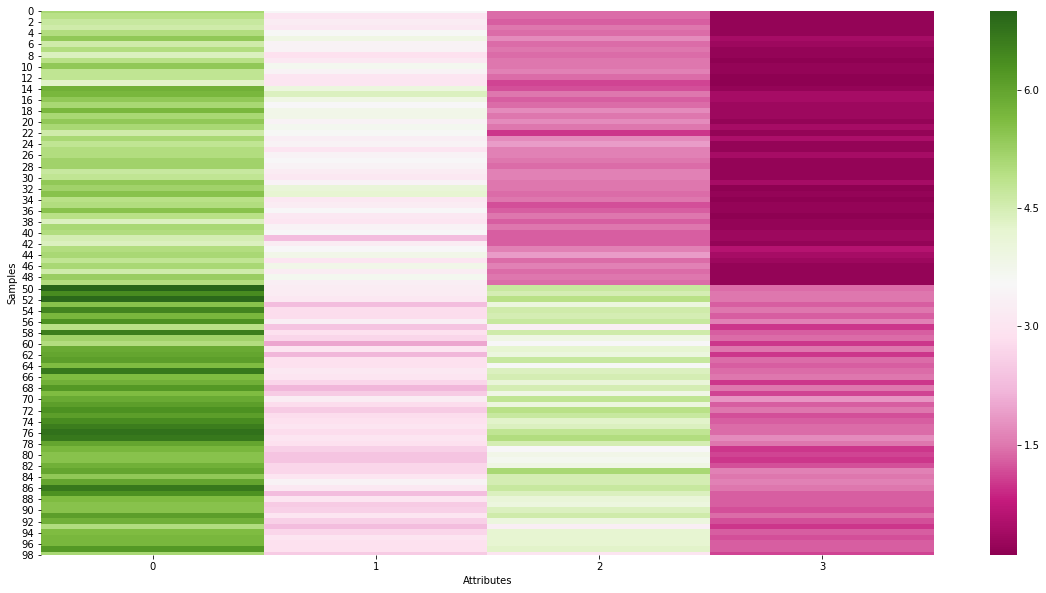

In [62]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')

<span style="color:green">Answer: </span> 

The last two attributes are useful to separate the two classes. 

<span style="color:red">**Question:** </span>
Using only the first two attributes, project the selected points in X (below) from the iris dataset using LDA. Determine if the two classes are separated despite choosing the first two attributes. Compute the absolute difference between the two means in the projected space. 
Hint: Use LinearDiscriminantAnalysis function from scikit library. 

**Steps involved in performing LDA**
1. Input data: set of points in $R^d$
2. Compute mean vectors $\mu_1$ and $\mu_2$
3. Compute between class scatter matrix $S_B$
4. Compute within class scatter matrix $S_W$
5. Compute the matrix $S_W^{-1}S_B$
4. Compute the first eigenvector ($v_1$) of the matrix $S_W^{-1}S_B$
5. Project data on to this eigenvector $Xv_1$

LinearDiscriminantAnalysis function accomplishes all of this.

In [63]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r1 = lda.fit(X[:,0:2], y).transform(X[:,0:2])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


[Text(159.0, 0.5, 'Samples'), Text(0.5, 69.0, 'Attributes')]

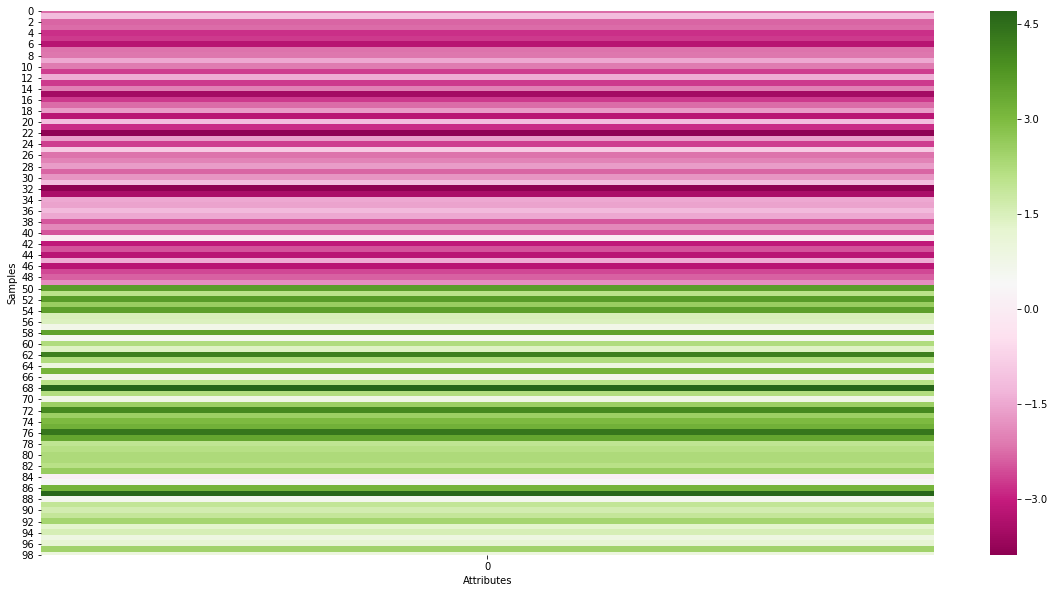

In [64]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X_r1,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')

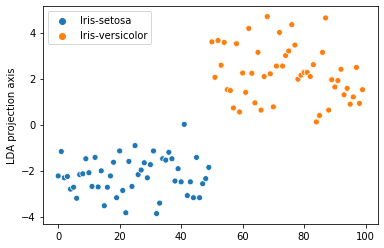

In [65]:
fig = sns.scatterplot(x=np.arange(np.size(X_r1)),y=X_r1[:,0],hue=y)
plt.ylabel('LDA projection axis')
plt.show(fig)

Computing the absolute difference between the means in the projected space.

In [66]:
abs(np.mean(X_r1[y=='Iris-setosa',0]) - np.mean(X_r1[y=='Iris-versicolor',0]))

4.436979775442079